# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Stefan|secret |
|Thijs|secret |
|Mustafa|secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace

import networkx as nx
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [3]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')


<Graph identifier=N11d1384dbd3a47478131641ec62e901d (<class 'rdflib.graph.Graph'>)>

In [4]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/The_Strange_Familiar'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Pasadena_Convention_Center'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [5]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/The_Strange_Familiar'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Pasadena_Convention_Center'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))])

# Familie databases

In [6]:
# lege digraph
Families = nx.DiGraph()  

# 1 familie
Families.add_edges_from([(0,4), (1,4), (0,5), (1,5), (0,6), (1,6)])
Families.add_edges_from([(2,7), (3,7), (2,8), (3,8)])
Families.add_edges_from([(4,11), (7,11), (4,12), (7,12), (8,13), (10,13), (8,14), (10,14), (6,15), (6,16), (9,15), (9,16)])

# 1 familie
Families.add_edges_from([(18,17), (19,17), (18,20), (19,20)])
Families.add_edges_from([(21,23), (21,24), (22,23), (22,24)])
Families.add_edges_from([(25,19), (26,19), (25,21), (26,21)])
Families.add_edges_from([(27,29), (27,30), (28,29), (28,30)])
Families.add_edges_from([(31,33), (31,34), (32,33), (32,34)])
Families.add_edges_from([(35,37), (36,37)])
Families.add_edges_from([(38,40), (38,41), (39,40), (39,41)])
Families.add_edges_from([(42,44), (43,44), (42,45), (43,45)])
Families.add_edges_from([(49,18), (50,18), (49, 27), (50, 27), (49, 31), (50, 31), (49, 36), (50, 36), (49, 38), 
                         (50, 38), (49, 42), (50, 42), (49, 46), (50, 46), (49, 48), (50, 48), (35, 47), (36, 47)])

# mannen en vrouwen gedefinieerd
M = {0,2,7,9,10,11,12,13,17,18,20,21,23,26,27,29,30,31,35,38,40,41,42,44,45,47,48,50} 
V = {1,3,4,5,6,8,14,15,16,19,22,24,25,28,32,33,34,36,37,39,43,46,49} 

# kloppend maken
for n in M:
    Families.nodes[n]['M']=True
    Families.nodes[n]['V']=False
for n in V:
    Families.nodes[n]['V']=True
    Families.nodes[n]['M']=False 
    
# comprehensies als formules
G=Families
def M(x, network=G):
    return network.nodes[x]['M']
def V(x, network=G):
    return network.nodes[x]['V']
def R(x,y,network=G):
    return network.has_edge(x,y)

In [7]:
# comprehensies
Opa = {(x,y) for x in Families for y in Families 
       if {z for z in Families if R(x,z,Families)} & {z for z in Families if R(z,y,Families) and M(x,Families)}}
Oma = {(x,y) for x in Families for y in Families 
      if {z for z in Families if R(x,z,Families)} & {z for z in Families if R(z,y,Families) and V(x,Families)}}

Vader = {(x,y) for x in Families for y in Families if R(x,y,Families) and M(x,Families)}
Moeder = {(x,y) for x in Families for y in Families if R(x,y,Families) and V(x,Families)}

Zoon = {(x,y) for x in Families for y in Families if R(y,x,Families) and M(x,Families)}
Dochter = {(x,y) for x in Families for y in Families if R(y,x,Families) and V(x,Families)}

Broer = {(x,y) for x in Families for y in Families
         if {z for z in Families if R(z,x,Families)} & {z for z in Families if R(z,y,Families) and M(x,Families)} and x != y}
Zus = {(x,y) for x in Families for y in Families
      if {z for z in Families if R(z,x,Families)} & {z for z in Families if R(z,y,Families) and V(x,Families)} and x != y}

# toevoegen aan de digraph en labels toevoegen aan de edges
Families2 = nx.DiGraph()  
Families2.add_edges_from(Vader, label='Vader_van')
Families2.add_edges_from(Moeder, label='Moeder_van')
Families2.add_edges_from(Opa, label='Opa_van')
Families2.add_edges_from(Oma, label='Oma_van')
Families2.add_edges_from(Broer, label='Broer_van')
Families2.add_edges_from(Zus, label='Zus_van')
Families2.add_edges_from(Zoon, label='Zoon_van')
Families2.add_edges_from(Dochter, label='Dochter_van')

# LHBTQI+ Database

In [8]:
#lege digraph
LHBTQI = nx.DiGraph()

# edges toevoegen
LHBTQI.add_edges_from([('HM','HV'), ('HM','L'), ('HM','BV')])
LHBTQI.add_edges_from([('HV','HM'), ('HV','H'), ('HV','BM')])
LHBTQI.add_edges_from([('H','HM'), ('H','H'), ('H','BM')])
LHBTQI.add_edges_from([('L','HV'), ('L','L'), ('L','BV')])
LHBTQI.add_edges_from([('BM','HM'), ('BM','H'), ('BM','BM'), ('BM','HV'), ('BM','L'), ('BM','BV')])
LHBTQI.add_edges_from([('BV','HV'), ('BV','L'), ('BV','BV'), ('BV','HM'), ('BV','H'), ('BV','BM')])
LHBTQI.add_edges_from([('Q','HM'), ('Q','HV'), ('Q','H'), ('Q','L'), ('Q','BM'), ('Q','BV'), ('Q','Q'), ('Q','P')])

# legenda
print('HM: Hetero (Straight) Man')
print('HV: Hetero (Straight) Vrouw')
print('H: Homoseksuele Man')
print('L: Lesbische Vrouw')
print('BM: Biseksuele Man')
print('BV: Biseksuele Vrouw')
print('Q: Queer')
print('P: Plus')

HM: Hetero (Straight) Man
HV: Hetero (Straight) Vrouw
H: Homoseksuele Man
L: Lesbische Vrouw
BM: Biseksuele Man
BV: Biseksuele Vrouw
Q: Queer
P: Plus


# Networkx to RDF

Uit de networkx graph worden de nodes, edges en edge labels gebruikt.     
Nodes zijn de subjects en objects, edge labels de predicates.     
Die moeten allemaal toegevoegd worden aan de RDF graph A met A.add().        
De edge label bij de dict comprehensies is de predicate.    
Als er geen edge label bestaat wordt daar 'Relatie' voor in de plaats gezet.    

In [9]:
def networkx2RDF(G):
    
    # RDF graph
    A = Graph()
    
    # edgelist
    edges = nx.to_edgelist(G)
    
    # for loop voor alle edges
    for edge in edges:
        if edge[2]:
            for key, value in edge[2].items():
                predicate = value
            
            # subject
            subj = Namespace("http://example.org/people/")  
            subj += URIRef(str(edge[0]))
            
            # object
            obj = Namespace("http://example.org/people/")
            obj += URIRef(str(edge[1]))
            
            # predicate
            pred = Namespace("http://example.org/relation/")
            pred += URIRef(predicate)
            
            # toevoegen aan A
            A.add((subj,pred,obj))
            
        else:
            
            # subject
            subj = Namespace("http://example.org/people/")  
            subj += URIRef(str(edge[0]))
            
            # object
            obj = Namespace("http://example.org/people/")
            obj += URIRef(str(edge[1]))
            
            # predicate
            pred = Namespace("http://example.org/relation/")
            pred += URIRef('Relatie')
            
            # toevoegen aan A
            A.add((subj,pred,obj))
            
    return A


#### Tests

In [10]:
print('Familie zonder edge labels:')
print(networkx2RDF(Families).serialize(format='n3').decode("utf-8"))

print('Familie met edge labels:')
print(networkx2RDF(Families2).serialize(format='n3').decode("utf-8"))

print('LHBTQI+:')
print(networkx2RDF(LHBTQI).serialize(format='n3').decode("utf-8"))

Familie zonder edge labels:
@prefix ns1: <http://example.org/relation/> .

<http://example.org/people/0> ns1:Relatie <http://example.org/people/4>,
        <http://example.org/people/5>,
        <http://example.org/people/6> .

<http://example.org/people/1> ns1:Relatie <http://example.org/people/4>,
        <http://example.org/people/5>,
        <http://example.org/people/6> .

<http://example.org/people/10> ns1:Relatie <http://example.org/people/13>,
        <http://example.org/people/14> .

<http://example.org/people/2> ns1:Relatie <http://example.org/people/7>,
        <http://example.org/people/8> .

<http://example.org/people/22> ns1:Relatie <http://example.org/people/23>,
        <http://example.org/people/24> .

<http://example.org/people/25> ns1:Relatie <http://example.org/people/19>,
        <http://example.org/people/21> .

<http://example.org/people/26> ns1:Relatie <http://example.org/people/19>,
        <http://example.org/people/21> .

<http://example.org/people/28> ns1:Re

# SPARQL Queries

#### Voorbeeld van hoe de SPARQL query bij Families werkt en er uit ziet

In [11]:
example = networkx2RDF(Families).query(
    """SELECT DISTINCT 
    ?o ?p ?s 
    WHERE 
    {?o ?p ?s}""")

type(example), len(example), list(example)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 70,
 [(rdflib.term.URIRef('http://example.org/people/50'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/18')),
  (rdflib.term.URIRef('http://example.org/people/42'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/45')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/38')),
  (rdflib.term.URIRef('http://example.org/people/25'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/19')),
  (rdflib.term.URIRef('http://example.org/people/38'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/41'))])

#### Voorbeeld van hoe de SPARQL query bij LHBTQI werkt en er uit ziet

In [12]:
example2 = networkx2RDF(LHBTQI).query(
    """SELECT DISTINCT 
    ?o ?p ?s 
    WHERE 
    {?o ?p ?s}""")

type(example2), len(example2), list(example2)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 32,
 [(rdflib.term.URIRef('http://example.org/people/H'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/HM')),
  (rdflib.term.URIRef('http://example.org/people/BM'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/BV')),
  (rdflib.term.URIRef('http://example.org/people/BV'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/BV')),
  (rdflib.term.URIRef('http://example.org/people/L'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/L')),
  (rdflib.term.URIRef('http://example.org/people/HM'),
   rdflib.term.URIRef('http://example.org/relation/Relatie'),
   rdflib.term.URIRef('http://example.org/people/L'))])

#### SPARQL queries van de familierelaties uit 'Families2'

Aangezien 'Families' en 'LHBTQI' geen gedefinieerde relaties hebben buiten 'Relatie' zullen deze niet uitgebreid behandeld worden. De queries zouden er hetzelfde uitzien als het voorbeeld hierboven.

#### SPARQL queries voor alle gedefinieerde familierelaties uit de database van 'Families2'

Bij SPARQL wordt er gebruik gemaakt van triples. Deze triples bestaan uit een subject, een predicate en een object. In dit geval zijn de subject en object personen en is de predicate de relatie tussen die twee personen.
Om alle personen die een bepaald soort relatie hebben te vinden door middel van SPARQL doe je het volgende:

opa_q = networkx2RDF(Families2).query(   
    """PREFIX relatie: http://example.org/relation/   
    SELECT    
    ?o ?s     
    WHERE    
    {?o relatie:Opa_van ?s}""")   

De prefix in deze query zorgt ervoor dat je niet elke keer de voledige URI hoeft in te typen. Na SELECT specificieer je welke informatie je wilt weten van de personen met de relatie waar je naar op zoek bent. In het voorbeeld hierboven vragen wij de database om de object en subject van die entries in de database, dit zijn de namen van de personen. 
Na de WHERE specificieer je naar welke personen je op zoek bent. In dit geval willen wij de namen van alle personen in de database die een opa relatie met elkaar hebben, dan is de subject dus de opa van de object.

#### Opa

In [13]:
opa_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Opa_van ?s}""")

type(opa_q), len(opa_q), list(opa_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 24,
 [(rdflib.term.URIRef('http://example.org/people/50'),
   rdflib.term.URIRef('http://example.org/people/34')),
  (rdflib.term.URIRef('http://example.org/people/26'),
   rdflib.term.URIRef('http://example.org/people/24')),
  (rdflib.term.URIRef('http://example.org/people/50'),
   rdflib.term.URIRef('http://example.org/people/41')),
  (rdflib.term.URIRef('http://example.org/people/26'),
   rdflib.term.URIRef('http://example.org/people/17')),
  (rdflib.term.URIRef('http://example.org/people/2'),
   rdflib.term.URIRef('http://example.org/people/14'))])

#### Oma

In [14]:
oma_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Oma_van ?s}""")

type(oma_q), len(oma_q), list(oma_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 24,
 [(rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/29')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/20')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/45')),
  (rdflib.term.URIRef('http://example.org/people/3'),
   rdflib.term.URIRef('http://example.org/people/12')),
  (rdflib.term.URIRef('http://example.org/people/25'),
   rdflib.term.URIRef('http://example.org/people/20'))])

#### Vader

In [15]:
vader_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Vader_van ?s}""")

type(vader_q), len(vader_q), list(vader_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 35,
 [(rdflib.term.URIRef('http://example.org/people/50'),
   rdflib.term.URIRef('http://example.org/people/38')),
  (rdflib.term.URIRef('http://example.org/people/7'),
   rdflib.term.URIRef('http://example.org/people/12')),
  (rdflib.term.URIRef('http://example.org/people/50'),
   rdflib.term.URIRef('http://example.org/people/48')),
  (rdflib.term.URIRef('http://example.org/people/27'),
   rdflib.term.URIRef('http://example.org/people/30')),
  (rdflib.term.URIRef('http://example.org/people/2'),
   rdflib.term.URIRef('http://example.org/people/7'))])

#### Moeder

In [16]:
moeder_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Moeder_van ?s}""")

type(moeder_q), len(moeder_q), list(moeder_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 35,
 [(rdflib.term.URIRef('http://example.org/people/4'),
   rdflib.term.URIRef('http://example.org/people/11')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/31')),
  (rdflib.term.URIRef('http://example.org/people/1'),
   rdflib.term.URIRef('http://example.org/people/4')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/27')),
  (rdflib.term.URIRef('http://example.org/people/49'),
   rdflib.term.URIRef('http://example.org/people/42'))])

#### Zoon

In [17]:
zoon_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Zoon_van ?s}""")

type(zoon_q), len(zoon_q), list(zoon_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 42,
 [(rdflib.term.URIRef('http://example.org/people/27'),
   rdflib.term.URIRef('http://example.org/people/50')),
  (rdflib.term.URIRef('http://example.org/people/38'),
   rdflib.term.URIRef('http://example.org/people/50')),
  (rdflib.term.URIRef('http://example.org/people/42'),
   rdflib.term.URIRef('http://example.org/people/49')),
  (rdflib.term.URIRef('http://example.org/people/21'),
   rdflib.term.URIRef('http://example.org/people/26')),
  (rdflib.term.URIRef('http://example.org/people/23'),
   rdflib.term.URIRef('http://example.org/people/22'))])

#### Dochter

In [18]:
dochter_q = networkx2RDF(Families2).query("""PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Dochter_van ?s}""")

type(dochter_q), len(dochter_q), list(dochter_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 28,
 [(rdflib.term.URIRef('http://example.org/people/5'),
   rdflib.term.URIRef('http://example.org/people/1')),
  (rdflib.term.URIRef('http://example.org/people/16'),
   rdflib.term.URIRef('http://example.org/people/6')),
  (rdflib.term.URIRef('http://example.org/people/15'),
   rdflib.term.URIRef('http://example.org/people/9')),
  (rdflib.term.URIRef('http://example.org/people/37'),
   rdflib.term.URIRef('http://example.org/people/35')),
  (rdflib.term.URIRef('http://example.org/people/37'),
   rdflib.term.URIRef('http://example.org/people/36'))])

#### Broer

In [19]:
broer_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Broer_van ?s}""")

type(broer_q), len(broer_q), list(broer_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 57,
 [(rdflib.term.URIRef('http://example.org/people/31'),
   rdflib.term.URIRef('http://example.org/people/42')),
  (rdflib.term.URIRef('http://example.org/people/21'),
   rdflib.term.URIRef('http://example.org/people/19')),
  (rdflib.term.URIRef('http://example.org/people/29'),
   rdflib.term.URIRef('http://example.org/people/30')),
  (rdflib.term.URIRef('http://example.org/people/27'),
   rdflib.term.URIRef('http://example.org/people/46')),
  (rdflib.term.URIRef('http://example.org/people/42'),
   rdflib.term.URIRef('http://example.org/people/36'))])

#### Zus

In [20]:
zus_q = networkx2RDF(Families2).query(
    """PREFIX relatie: <http://example.org/relation/>
    SELECT 
    ?o ?s 
    WHERE 
    {?o relatie:Zus_van ?s}""")

type(zus_q), len(zus_q), list(zus_q)[:5]

(rdflib.plugins.sparql.processor.SPARQLResult,
 29,
 [(rdflib.term.URIRef('http://example.org/people/24'),
   rdflib.term.URIRef('http://example.org/people/23')),
  (rdflib.term.URIRef('http://example.org/people/36'),
   rdflib.term.URIRef('http://example.org/people/46')),
  (rdflib.term.URIRef('http://example.org/people/36'),
   rdflib.term.URIRef('http://example.org/people/38')),
  (rdflib.term.URIRef('http://example.org/people/46'),
   rdflib.term.URIRef('http://example.org/people/27')),
  (rdflib.term.URIRef('http://example.org/people/36'),
   rdflib.term.URIRef('http://example.org/people/18'))])

# RDF to networkx

## Kennis en Data van een RDF Graaf


In [21]:
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

## Stap 1: Het inladen van een RDF Graaf
Als eerst moet er een RDF Graaf ingeladen worden. Dat kan bereikt worden met de parse() functie. <br>
Het is mogelijk om verschillende soorten RDF formats in te laden. Zo zijn er verschillende soorten RDF datatypes zoals Turtle (.ttl) en N-triples(.nt)<br>
Afhankelijk van het datatype dient het format binnen de parse() functie aangegeven te worden. <br>


In [22]:
g = RDFGraph()
g.parse("http://akswnc7.informatik.uni-leipzig.de/dstreitmatter/archivo/ns.bergnet.org/tac--0--1--triple-access-control/2020.06.10-184341/tac--0--1--triple-access-control_type=shaclReport_validates=lodeMetadata.ttl", format = "turtle")

<Graph identifier=Nf6b94c7f5fbb44518998817ebc2918b2 (<class 'rdflib.graph.Graph'>)>

## Stap 2: RDF Graaf transformeren naar een Networkx Graaf
In de documentatie van RDFlib is een functie te vinden die een RDF graaf transformeert naar een Networkx Graaf.


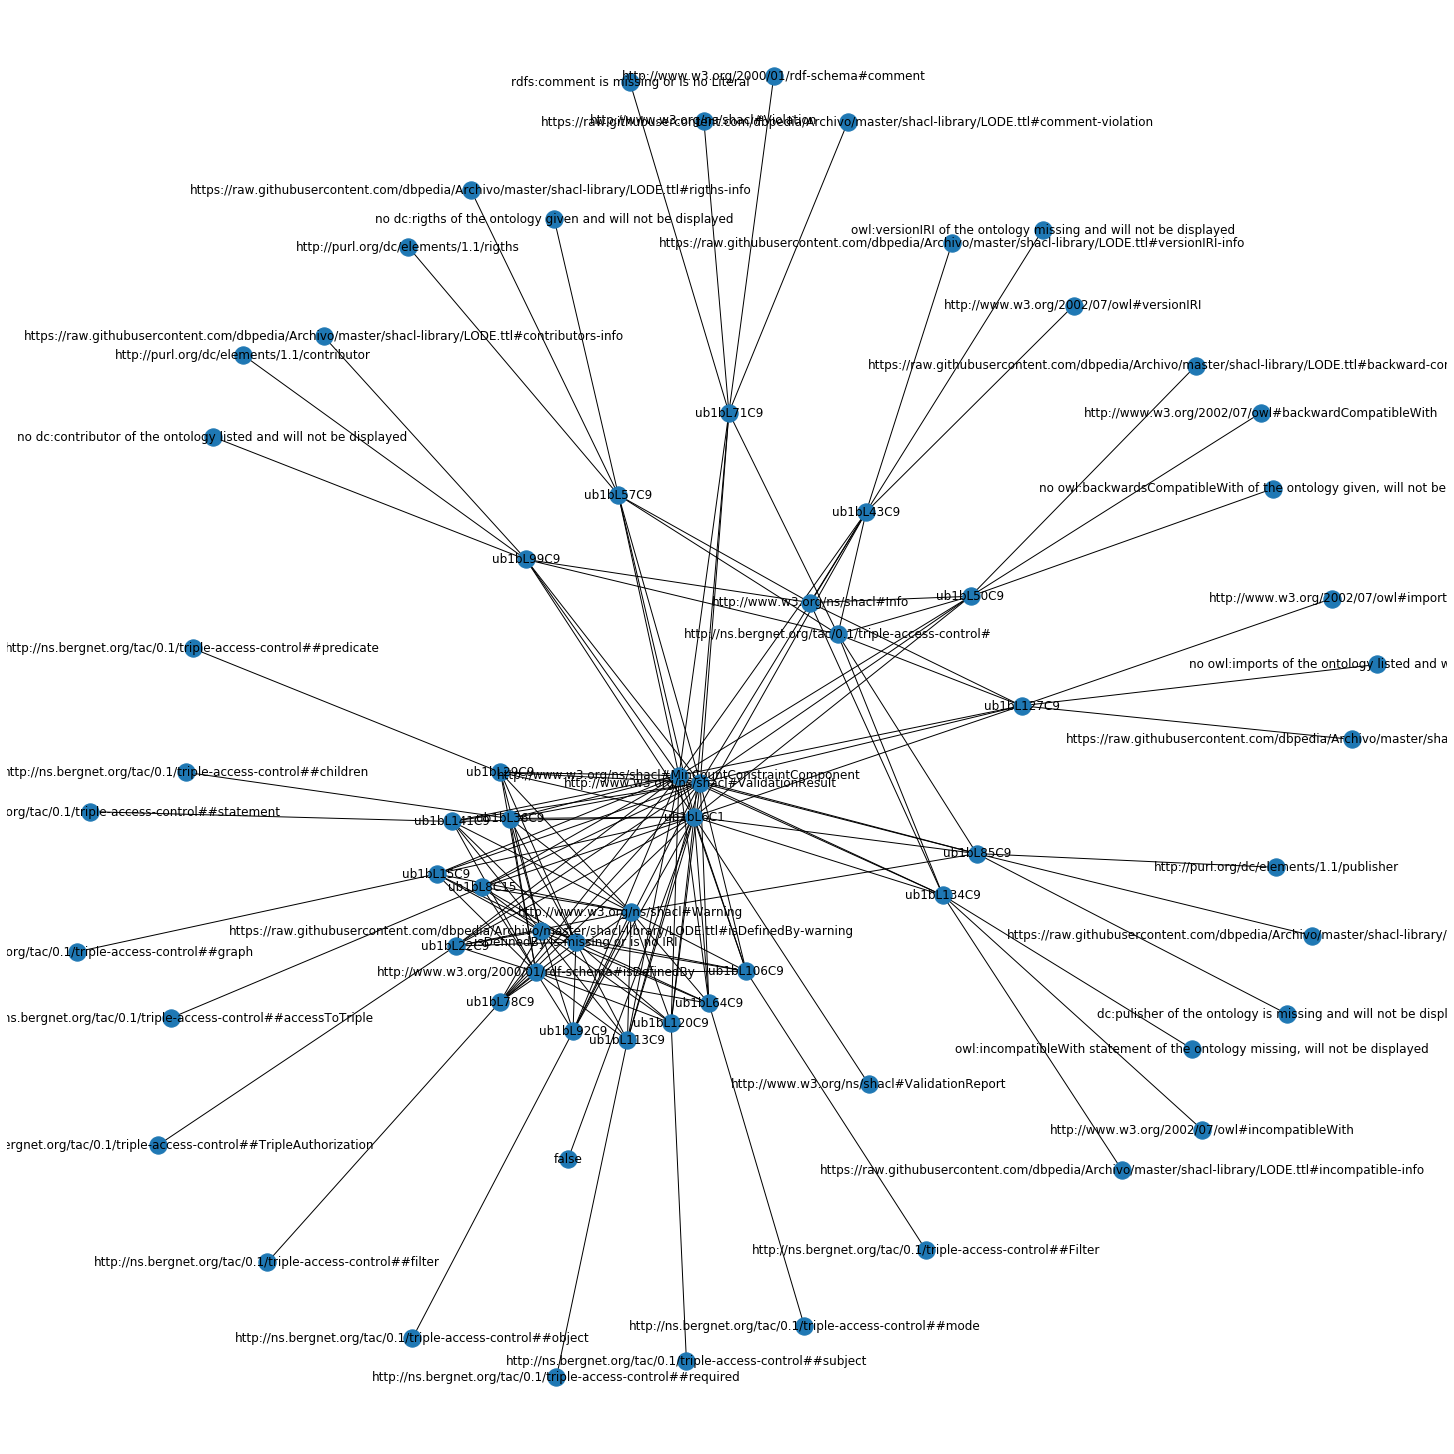

In [23]:
G = rdflib_to_networkx_graph(g)
plt.figure(figsize = (20, 20))
nx.draw(G, with_labels = True)

## Stap 3: Networkx Graaf analyseren
Nu de RDF Graaf is omgezet naar een Networkx graaf kunnen er netwerk maten op berekend worden.


In [24]:
print("Aantal nodes:", len(G))

print("Aantal edges:", len(G.edges()))

print("Dichtheid:", format(nx.density(G)))



Aantal nodes: 68
Aantal edges: 162
Dichtheid: 0.07111501316944688


### Centralities

In [25]:
betweennes_central = nx.betweenness_centrality(G)
print("Betweennes centrality van de nodes, oplopende waarden:\n", sorted(betweennes_central.values()))
print("")

closeness_central = nx.closeness_centrality(G)
print("Closeness centrality van de nodes, oplopende waarden:\n", sorted(closeness_central.values()))
print("")

eigen_central = nx.eigenvector_centrality(G)
print("Eigenvector centrality van de nodes, oplopende waarden:\n", sorted(eigen_central.values()))
print("")

gemiddelde_betweenness_centrality = sum(betweennes_central.values()) / len(betweennes_central.values())
print("gemiddelde Betweenness centrality:", gemiddelde_betweenness_centrality)

gemiddelde_closeness_centrality = sum(closeness_central.values()) / len(closeness_central.values())
print("gemiddelde Closeness centrality:", gemiddelde_closeness_centrality)

gemiddelde_eigen_central = sum(eigen_central.values()) / len(eigen_central.values())
print("gemiddelde Eigenvector centrality:", gemiddelde_eigen_central)



Betweennes centrality van de nodes, oplopende waarden:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017057569296375256, 0.017057569296375256, 0.017057569296375256, 0.021709633649932156, 0.029757704981585583, 0.03594962251678667, 0.03594962251678667, 0.03594962251678667, 0.03594962251678667, 0.035949622516786676, 0.03594962251678668, 0.03594962251678669, 0.03594962251678669, 0.0359496225167867, 0.035949622516786704, 0.035949622516786704, 0.035949622516786704, 0.04975124378109455, 0.09257332220018798, 0.09334313282074476, 0.09334313282074477, 0.09334313282074477, 0.09334313282074479, 0.0933431328207448, 0.09334313282074481, 0.11859565807327005, 0.20911546165277528, 0.20911546165277528, 0.26836467015571513]

Closeness centrality van de nodes, oplopende waarden:
 [0.29130434782608694, 0.29130434782608694, 0.29130434782608694, 0.2913043478

### In- en Out-degree

In [26]:
G_directed = G.to_directed()

in_degrees = G_directed.in_degree()
in_values = sorted(dict(in_degrees).values())
in_histogram = [in_values.count(x) for x in in_values]

out_degrees = G_directed.out_degree()
out_values = sorted(dict(out_degrees).values())
out_histogram = [out_values.count(x) for x in out_values]

print("In-Degrees\n", in_values)
print("")
print("Out-Degrees\n", out_values)

In-Degrees
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 13, 20, 20, 22]

Out-Degrees
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 13, 20, 20, 22]


### Clusters van de Graaf

In [27]:
clusters = nx.clustering(G)
print("Aantal clusters:", len(clusters), "\n")
cluster = []
for i in clusters:
    aantal_nodes = []
    cluster.append(1)
    print("Cluster", len(cluster), "heeft")
    for j in i:
        aantal_nodes.append(i)
    print(len(aantal_nodes), "nodes\n")
        


Aantal clusters: 68 

Cluster 1 heeft
8 nodes

Cluster 2 heeft
9 nodes

Cluster 3 heeft
10 nodes

Cluster 4 heeft
9 nodes

Cluster 5 heeft
91 nodes

Cluster 6 heeft
9 nodes

Cluster 7 heeft
9 nodes

Cluster 8 heeft
43 nodes

Cluster 9 heeft
9 nodes

Cluster 10 heeft
54 nodes

Cluster 11 heeft
10 nodes

Cluster 12 heeft
97 nodes

Cluster 13 heeft
10 nodes

Cluster 14 heeft
52 nodes

Cluster 15 heeft
9 nodes

Cluster 16 heeft
34 nodes

Cluster 17 heeft
10 nodes

Cluster 18 heeft
9 nodes

Cluster 19 heeft
9 nodes

Cluster 20 heeft
99 nodes

Cluster 21 heeft
10 nodes

Cluster 22 heeft
104 nodes

Cluster 23 heeft
31 nodes

Cluster 24 heeft
9 nodes

Cluster 25 heeft
48 nodes

Cluster 26 heeft
9 nodes

Cluster 27 heeft
35 nodes

Cluster 28 heeft
75 nodes

Cluster 29 heeft
36 nodes

Cluster 30 heeft
9 nodes

Cluster 31 heeft
59 nodes

Cluster 32 heeft
10 nodes

Cluster 33 heeft
62 nodes

Cluster 34 heeft
40 nodes

Cluster 35 heeft
9 nodes

Cluster 36 heeft
44 nodes

Cluster 37 heeft
61 nodes

